<a href="https://colab.research.google.com/github/Shubham05-tech/Linear-and-Multiple-Regression/blob/main/multiple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from google.colab import files
uploaded = files.upload()

Saving startups.csv to startups.csv


In [7]:
score = pd.read_csv("startups.csv")
score.shape
score.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
X = score.drop('Profit',axis=1)
y = score['Profit']
print(X,y)


    R&D Spend  Administration  Marketing Spend       State
0   165349.20       136897.80        471784.10    New York
1   162597.70       151377.59        443898.53  California
2   153441.51       101145.55        407934.54     Florida
3   144372.41       118671.85        383199.62    New York
4   142107.34        91391.77        366168.42     Florida
5   131876.90        99814.71        362861.36    New York
6   134615.46       147198.87        127716.82  California
7   130298.13       145530.06        323876.68     Florida
8   120542.52       148718.95        311613.29    New York
9   123334.88       108679.17        304981.62  California
10  101913.08       110594.11        229160.95     Florida
11  100671.96        91790.61        249744.55  California
12   93863.75       127320.38        249839.44     Florida
13   91992.39       135495.07        252664.93  California
14  119943.24       156547.42        256512.92     Florida
15  114523.61       122616.84        261776.23    New Yo

In [12]:
X = pd.get_dummies(X, drop_first=True)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [17]:
# printing parameters
print(regressor.intercept_)
print(regressor.coef_)

54028.03959364581
[ 8.05630064e-01 -6.87878823e-02  2.98554429e-02  9.38793006e+02
  6.98775997e+00]


In [21]:
# making pridecition
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df

,Actual,Predicted
13,134307.35,126362.879083
39,81005.76,84608.453836
30,99937.59,99677.494251
45,64926.08,46357.460686
17,125370.37,128750.482885
48,35673.41,50912.417419
26,105733.54,109741.350327
25,107404.34,100643.242816
32,97427.84,97599.275746
19,122776.86,113097.425244


In [22]:
# Coefficient
from sklearn.metrics import mean_squared_error, r2_score
print('coefficients:\n', regressor.coef_)

# The mean square error
print('mean_squared error: %.2f'
      %mean_squared_error(y_test, y_pred))

# the coefficent of determination: 1 is perfect prediction
print('R^2 Score: %.2f'
      % r2_score(y_test, y_pred))

coefficients:
 [ 8.05630064e-01 -6.87878823e-02  2.98554429e-02  9.38793006e+02
  6.98775997e+00]
mean_squared error: 82010363.04
R^2 Score: 0.90


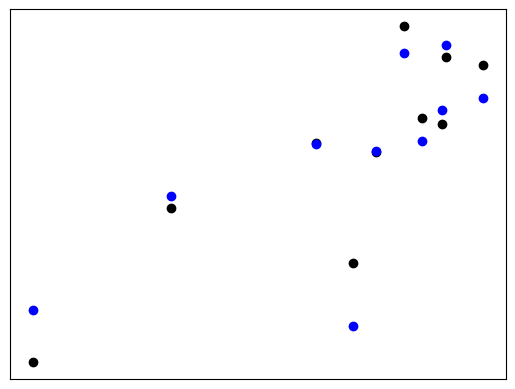

In [23]:
# Plot outputs
plt.scatter(X_test['Administration'], y_test, color='black')
plt.scatter(X_test['Administration'], y_pred, color='blue')

plt.xticks(())
plt.yticks(())
plt.show()